In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

plt.rc('font', family = "gulim")
plt.rc('axes', unicode_minus = False)

In [3]:
from sklearn.linear_model import LinearRegression

In [39]:
mtcars = pd.read_excel(r"C:\Users\user\Desktop\pandas, seaborn\dataset\mtcars.xlsx")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [40]:
## training set 나누기 
train_X = mtcars.loc[:, "cyl":"qsec"] # 대문자로 X 쓰면 matrix 
train_y = mtcars.loc[:, "mpg"]

print(train_X.head())
print(train_y.head())

print("")

   cyl   disp   hp  drat     wt   qsec
0    6  160.0  110  3.90  2.620  16.46
1    6  160.0  110  3.90  2.875  17.02
2    4  108.0   93  3.85  2.320  18.61
3    6  258.0  110  3.08  3.215  19.44
4    8  360.0  175  3.15  3.440  17.02
0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64



In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
# LinearRegression 함수를 호출하여 선형 회귀 모델의 인스턴스를 생성 
lr.fit(train_X, train_y) # 모델을 훈련 데이터에 맞춘다. 

LinearRegression()

In [43]:
print("Train R-square = ", round(lr.score(train_X, train_y)))

Train R-square =  1


In [44]:
lr.coef_ #LinearRegression 모델에서 학습된 특성들의 계수를 나타내는 속성
train_X.columns 
# train_X.columns : pandas DataFrame의 속성으로 훈련 데이터셋의 특성의 이름을 나타냄ㅁ
coeff_df = pd.DataFrame(lr.coef_, index=  train_X.columns, columns = ["coefficient"])
print(coeff_df)

      coefficient
cyl     -0.818560
disp     0.013205
hp      -0.017930
drat     1.320406
wt      -4.190832
qsec     0.401461


## KNN (k-nearest neigbors classifier)

In [5]:
# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [7]:
print("도미 무게 = {: .4f}, 길이 = {:.4f}".format(np.mean(bream_weight), np.mean(bream_length)))
print("방어 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(smelt_weight), np.mean(smelt_length)))

도미 무게 =  617.8286, 길이 = 33.1086
방어 무게 = 11.1786, 길이 = 11.9214


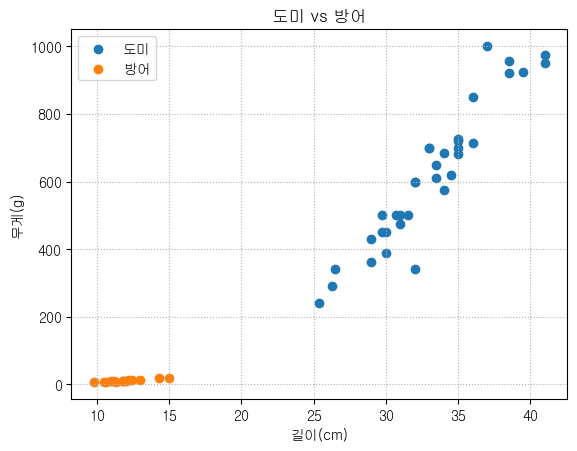

In [12]:
## Scatter plot 
plt.scatter(bream_length, bream_weight, label = "도미")
plt.scatter(smelt_length, smelt_weight, label = "방어")
plt.title("도미 vs 방어")
plt.xlabel("길이(cm)")
plt.ylabel("무게(g)")
plt.grid(linestyle = ":")
plt.legend()
plt.show()

In [20]:
## list 
length = bream_length + smelt_length ##리스트 뒤에 붙음
weight = bream_weight + smelt_weight 

print(np.shape(length))
print(np.shape(weight))

## x_2d
fish_data = np.column_stack([length, weight])
# np.column_stack() 
# : 1차원 배열들을 입력으로받아 이들을 열로 쌓아 2차원 배열을 만드는 기능
print(fish_data)
print(type(fish_data))
print(np.shape(fish_data))

(49,)
(49,)
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
<class 'numpy.ndarray'>
(49, 2)


In [22]:
len(bream_length)

35

In [26]:
## 
fish_target = np.append(np.ones(len(bream_length)), np.zeros(len(smelt_length)))
# np.ones(len(bream_length)): bream_length의 길이만큼 1로 채워진 배열을 생성합니다.
# np.zeros(len(smelt_length)): smelt_length의 길이만큼 0으로 채워진 배열을 생성합니다.
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [111]:
## KNN class
from sklearn.neighbors import KNeighborsClassifier
# KNeighborsClassifier
# scikit-learn 라이브러리에서 제공하는 k-최근접 이웃(KNN)분류 알고리즘

In [34]:
knn = KNeighborsClassifier(n_neighbors= 5,
                           weights = "uniform", 
                           metric = "minkowski",
                           p = 2 # 유클리디안으로 계산하겠다
                           # p = 1 : Manhattan 거리 L1 norm
                           # p = ∞: Chebyshev 거리
                           )
knn.fit(fish_data, fish_target)
print("Train ACC = ", knn.score(fish_data, fish_target))

## 1 = 적중률 100% 

Train ACC =  1.0


In [38]:
## Attribute
print("classes  = ", knn.classes_)
print("metrics = ", knn.effective_metric_ )
print("sample = ", knn.n_samples_fit_)

classes  =  [0. 1.]
metrics =  euclidean
sample =  49


In [45]:
## 
np.column_stack([fish_data, fish_target])
# np.column_stack() : 입력된 배열들을 열로 쌓아 새로운 2차원 배열을 생성 

array([[  25.4,  242. ,    1. ],
       [  26.3,  290. ,    1. ],
       [  26.5,  340. ,    1. ],
       [  29. ,  363. ,    1. ],
       [  29. ,  430. ,    1. ],
       [  29.7,  450. ,    1. ],
       [  29.7,  500. ,    1. ],
       [  30. ,  390. ,    1. ],
       [  30. ,  450. ,    1. ],
       [  30.7,  500. ,    1. ],
       [  31. ,  475. ,    1. ],
       [  31. ,  500. ,    1. ],
       [  31.5,  500. ,    1. ],
       [  32. ,  340. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33.5,  610. ,    1. ],
       [  33.5,  650. ,    1. ],
       [  34. ,  575. ,    1. ],
       [  34. ,  685. ,    1. ],
       [  34.5,  620. ,    1. ],
       [  35. ,  680. ,    1. ],
       [  35. ,  700. ,    1. ],
       [  35. ,  725. ,    1. ],
       [  35. ,  720. ,    1. ],
       [  36. ,  714. ,    1. ],
       [  36. ,  850. ,    1. ],
       [  37. , 1000. ,    1. ],
       [  

In [49]:
idx = np.arange(49)
np.random.shuffle(idx)

print(idx)

[42 17  5 27 37 22  3  1 38 32 30 26 31 34 29 20 45 28 11  6 13 47  2 46
 41 35 33 36 43 25 21 10 48  8 18 24 12 23  9 14 19  0  7 44 40 39 16 15
  4]


In [57]:
train_X = fish_data[idx[:35]]
train_y = fish_target[idx[:35]]

test_X = fish_data[idx[35:]]
test_y = fish_target[idx[35:]]

print(np.column_stack((train_X, train_y)))
print("result = \n",np.column_stack((test_X, test_y)))

[[  11.8    9.9    0. ]
 [  33.   700.     1. ]
 [  29.7  450.     1. ]
 [  36.   714.     1. ]
 [  10.6    7.     0. ]
 [  34.5  620.     1. ]
 [  29.   363.     1. ]
 [  26.3  290.     1. ]
 [  11.     9.7    0. ]
 [  39.5  925.     1. ]
 [  38.5  920.     1. ]
 [  35.   720.     1. ]
 [  38.5  955.     1. ]
 [  41.   950.     1. ]
 [  37.  1000.     1. ]
 [  34.   575.     1. ]
 [  12.4   13.4    0. ]
 [  36.   850.     1. ]
 [  31.   500.     1. ]
 [  29.7  500.     1. ]
 [  32.   340.     1. ]
 [  14.3   19.7    0. ]
 [  26.5  340.     1. ]
 [  13.    12.2    0. ]
 [  11.8   10.     0. ]
 [   9.8    6.7    0. ]
 [  41.   975.     1. ]
 [  10.5    7.5    0. ]
 [  12.     9.8    0. ]
 [  35.   725.     1. ]
 [  34.   685.     1. ]
 [  31.   475.     1. ]
 [  15.    19.9    0. ]
 [  30.   450.     1. ]
 [  33.5  610.     1. ]]
result = 
 [[ 35.  700.    1. ]
 [ 31.5 500.    1. ]
 [ 35.  680.    1. ]
 [ 30.7 500.    1. ]
 [ 32.  600.    1. ]
 [ 33.5 650.    1. ]
 [ 25.4 242.    1. ]
 

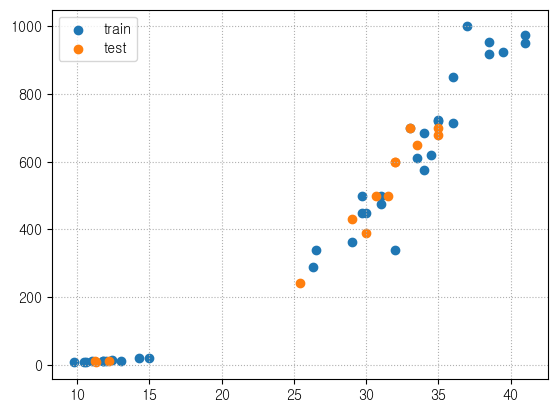

In [59]:
plt.scatter(train_X[:, 0],train_X[:, 1], label = "train")
plt.scatter(test_X[:, 0],test_X[:, 1], label = "test")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [72]:
knn = KNeighborsClassifier(
    n_neighbors = 5,
    weights = "uniform", 
    metric = "minkowski",
    p = 3
)

In [73]:
knn.fit(train_X, train_y)
print("Test Acc", knn.score(test_X, test_y))

## 이런 속성같은거 다 외우는게 아니라 인터넷에서 검색해서 필요한 부분을 찾아서 넣어라~
# 검색 자료를 보고 해석하는 능력이 더 중요하다 
# 한글 자료를 보고 영문 자료를 봐라~

print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("sample = ", knn.n_samples_fit_)

Test Acc 1.0
classes =  [0. 1.]
metrics =  minkowski
sample =  36


In [74]:
from sklearn.model_selection import train_test_split

In [80]:
train_X, test_X, train_y, test_y = train_test_split(
    fish_data, fish_target, stratify= fish_target, random_state = 1234
)  
print(train_X)

[[  12.4   13.4]
 [  32.   600. ]
 [  14.3   19.7]
 [  26.3  290. ]
 [  30.   390. ]
 [  37.  1000. ]
 [  33.   700. ]
 [  31.   475. ]
 [  31.5  500. ]
 [  13.    12.2]
 [  15.    19.9]
 [  11.8    9.9]
 [  41.   950. ]
 [  34.   685. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  30.   450. ]
 [  32.   340. ]
 [  33.5  650. ]
 [  12.2   12.2]
 [  26.5  340. ]
 [  10.5    7.5]
 [  12.     9.8]
 [  29.   430. ]
 [  39.5  925. ]
 [  35.   725. ]
 [  38.5  920. ]
 [  36.   714. ]
 [  29.   363. ]
 [  34.   575. ]
 [  31.   500. ]
 [  10.6    7. ]
 [  41.   975. ]
 [  29.7  500. ]
 [  35.   700. ]
 [  35.   680. ]]


In [84]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
knn.score(test_X, test_y)

1.0

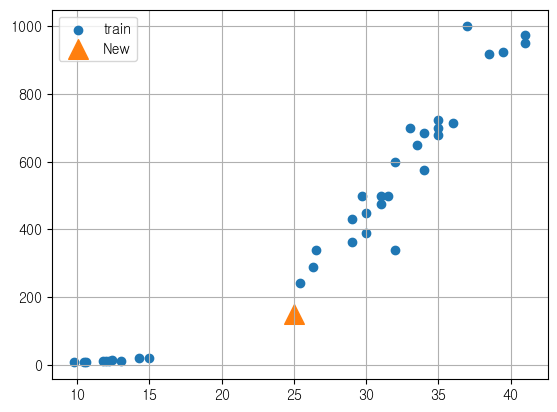

In [89]:
## 
plt.scatter(train_X[:,0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200,  label = "New")
plt.grid()
plt.legend()
plt.show()

In [136]:
knn.predict([[25,150]])
# 주어진 특성 값을 기반으로 새로운 데이터 포인트의 클래스를 예측하는 과정
# 25는 첫번째 특성(길이), 150은 두번째 특성(무게)

array([0.])

In [137]:
knn.kneighbors([[25, 150]])
# kneighbors() : 입력된 데이터 포인트에 대해 k개의 최근접 이웃을 찾는다. 

(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.32150953]]),
 array([[14, 10,  2,  0,  9]]))

In [138]:
distance, index = knn.kneighbors([[25, 150]])

plt.scatter(train_X[:,0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200,  label = "New")
plt.scatter(train_X[index,0], train_X[index, 1], c = "r")
plt.grid(linestyle = ":")
plt.legend()
plt.show()

# 길이보다 무게에 가중치를 더 많이 두고 있어서 이상하게 나옴
# 그래서 knn은 반드시 표준화해야된다. 


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [139]:
distance, index = knn.kneighbors([[25, 150]])

plt.scatter(train_X[:,0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200,  label = "New")
plt.scatter(train_X[index,0], train_X[index, 1], c = "r")
plt.xlim(0,1000) #x축 범위 바꾸기 
plt.grid(linestyle = ":")
plt.legend()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [140]:
## 표준화 
mean = np.mean(train_X, axis = 0)
# 길이에대한 평균, 무게에 대한 평균 
std = np.std(train_X, axis = 0)

#스케일링 
train_scaled  = (train_X - mean) /std
train_scaled
# train = (train_X = np.mean(train_X, axis = 0) /np.std(train_X, axis = 0))

array([-1.,  1.])

KNN 알고리즘 구현 순서
1. 데이터셋 준비(수집)
2. 데이터 전처리(KNN은 거리 기반 알고리즘으로, 특성의 스케일을 맞추는 것이 중요, 표준화 또는 정규화 사용)(훈련/테스트 데이터 분할)
3. k 값설정 : 일반적으로는 홀수로 설정해서 동점 상황을 피하는 것이 좋음 
4. 모델 훈련 : knn은 훈련 과정이 없으며, 훈련 데이터셋을 메모리에 저장함.
5. 예측 수행 : 새로운 데이터 입력-거리 계산-최근접 이웃 찾기-다수결 투표
6. 모델 평가 : 정확도 정밀도 재현율 f1-score
7. 결과 해석 및 조정
8. 최종 모델 저장 

In [141]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = "^", s = 100 )
plt.grid(linestyle = ":")
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [143]:
test_scaled = test_X - mean / std

knn.fit(train_scaled, train_y)
print("Test ACC = ",  knn.score(test_scaled, test_y))
print("Prediction = ", knn.predict([new]))

ValueError: Expected 2D array, got 1D array instead:
array=[-1.  1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [144]:
distance, index = knn.kneighbors([new])


In [145]:
plt.scatter(train_X[:,0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200,  label = "New")
plt.scatter(train_X[index,0], train_X[index, 1], c = "r")
plt.xlim(0,1000) #x축 범위 바꾸기 
plt.grid(linestyle = ":")
plt.legend()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [146]:
## GridSearch 

km = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30): 
    if n % 2 != 0:
        knn.n_negigbors = n 
        knn.fit(train_scaled, trian_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)



NameError: name 'trian_y' is not defined

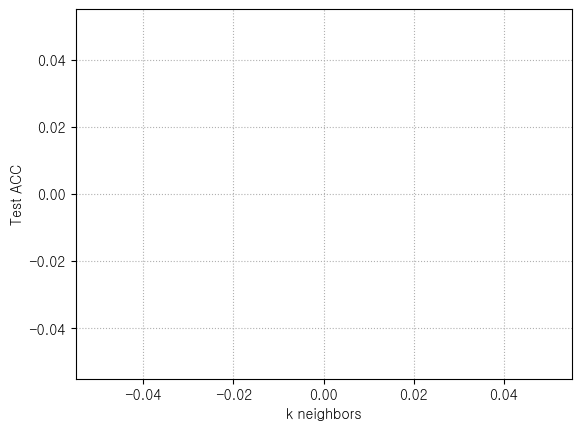

In [132]:
plt.plot(n_list, score_list)
plt.xlabel("k neighbors")
plt.ylabel("Test ACC")
plt.grid(linestyle = ":")
plt.show()

In [147]:
## knn을 이용한 lris 자료 해석 
iris = sns.load_dataset("Iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [173]:
sepal_length = iris["sepal_length"] # 꽃받침
sepal_width = iris["sepal_width"]
petal_length = iris["petal_length"] #꽃잎
petal_width = iris["petal_width"]

# length = sepal_length + petal_length
# width = sepal_width + petal_width

# x_2d
# iris_data를 원래 특성으로 정의
iris_data = np.column_stack([sepal_length, sepal_width, petal_length, petal_width])
# np.column_stack() 
# : 1차원 배열들을 입력으로받아 이들을 열로 쌓아 2차원 배열을 만드는 기능
print(iris_data)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [174]:
len(sepal_length)

150

In [181]:
iris_target = iris["species"].astype('category').cat.codes
iris_target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [182]:
print("Length of iris_data:", len(iris_data))
print("Length of iris_target:", len(iris_target))

Length of iris_data: 150
Length of iris_target: 150


In [183]:
knn = KNeighborsClassifier(
    n_neighbors = 5,
    weights = "uniform", 
    metric = "minkowski",
    p = 2
)
knn.fit(iris_data, iris_target)
print("Train ACC = ", knn.score(iris_data, iris_target))

Train ACC =  0.9666666666666667


In [184]:
idx = np.arange(150)
np.random.shuffle(idx)

print(idx)


[125  73  83  32  79 139  53 116  34  88 141 114  54  90  69   4 101   7
  20 110  40  38  77  16 127  41  22  35 143  81  72 144  85  55 126  56
  45  52  78  29  92  68 121  21 109 105 133  94  97 106  59  80  86   2
 129  95  62 111  49  14  15  64  33 107 131  93  37  60  36 137  12   0
 102 147  11   5  99  74 140 119 134  31  18 135 115 148 149 138  76  70
 123  44  63 100 112  17  65  96  25   8  42 128  46  51 103   3  26  27
 113  98 146  89 118  91  84  67  47  39  24 122  10  43  28 142   6  71
  19 132 136 104  30  13  50 120  48 108 124  58 117  87  82   1 130  23
  75  66   9 145  61  57]


In [185]:
train_X = iris_data[idx[:35]]
train_y = iris_target[idx[:35]]

test_X = iris_data[idx[35:]]
test_y = iris_target[idx[35:]]

print(np.column_stack((train_X, train_y)))
print("result = \n",np.column_stack((test_X, test_y)))

[[7.2 3.2 6.  1.8 2. ]
 [6.1 2.8 4.7 1.2 1. ]
 [6.  2.7 5.1 1.6 1. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.7 2.6 3.5 1.  1. ]
 [6.9 3.1 5.4 2.1 2. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.5 3.  5.5 1.8 2. ]
 [4.9 3.1 1.5 0.2 0. ]
 [5.6 3.  4.1 1.3 1. ]
 [6.9 3.1 5.1 2.3 2. ]
 [5.8 2.8 5.1 2.4 2. ]
 [6.5 2.8 4.6 1.5 1. ]
 [5.5 2.6 4.4 1.2 1. ]
 [5.6 2.5 3.9 1.1 1. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.8 2.7 5.1 1.9 2. ]
 [5.  3.4 1.5 0.2 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [6.5 3.2 5.1 2.  2. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [6.7 3.  5.  1.7 1. ]
 [5.4 3.9 1.3 0.4 0. ]
 [6.1 3.  4.9 1.8 2. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [6.8 3.2 5.9 2.3 2. ]
 [5.5 2.4 3.7 1.  1. ]
 [6.3 2.5 4.9 1.5 1. ]
 [6.7 3.3 5.7 2.5 2. ]
 [6.  3.4 4.5 1.6 1. ]
 [5.7 2.8 4.5 1.3 1. ]
 [6.2 2.8 4.8 1.8 2. ]]
result = 
 [[6.3 3.3 4.7 1.6 1. ]
 [4.8 3.  1.4 0.3 0. ]
 [6.9 3.1 4.9 1.5 1. ]
 [6.  2.9 4.5 1.5 1. ]
 [4.7 3.2 1.6 0.2 0. ]
 [5.8 2.6 4.  1.2 1. ]
 [6.2 2.2 4.5 1.5 1. ]
 [5.6 2.8 4.9 2.  2. ]

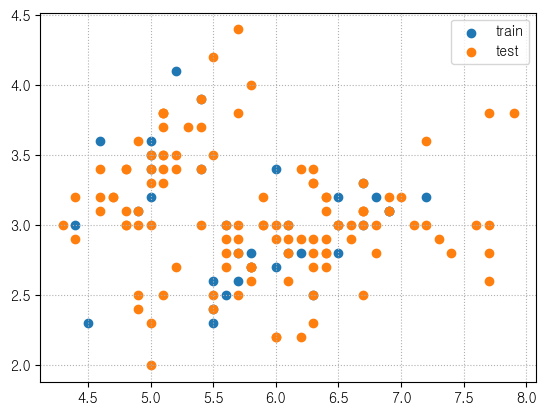

In [186]:
plt.scatter(train_X[:, 0],train_X[:, 1], label = "train")
plt.scatter(test_X[:, 0],test_X[:, 1], label = "test")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

-----------------------------------------------

In [190]:
## 교수님 풀이 
iris = sns.load_dataset('iris')
iris.head()
iris.shape

(150, 5)

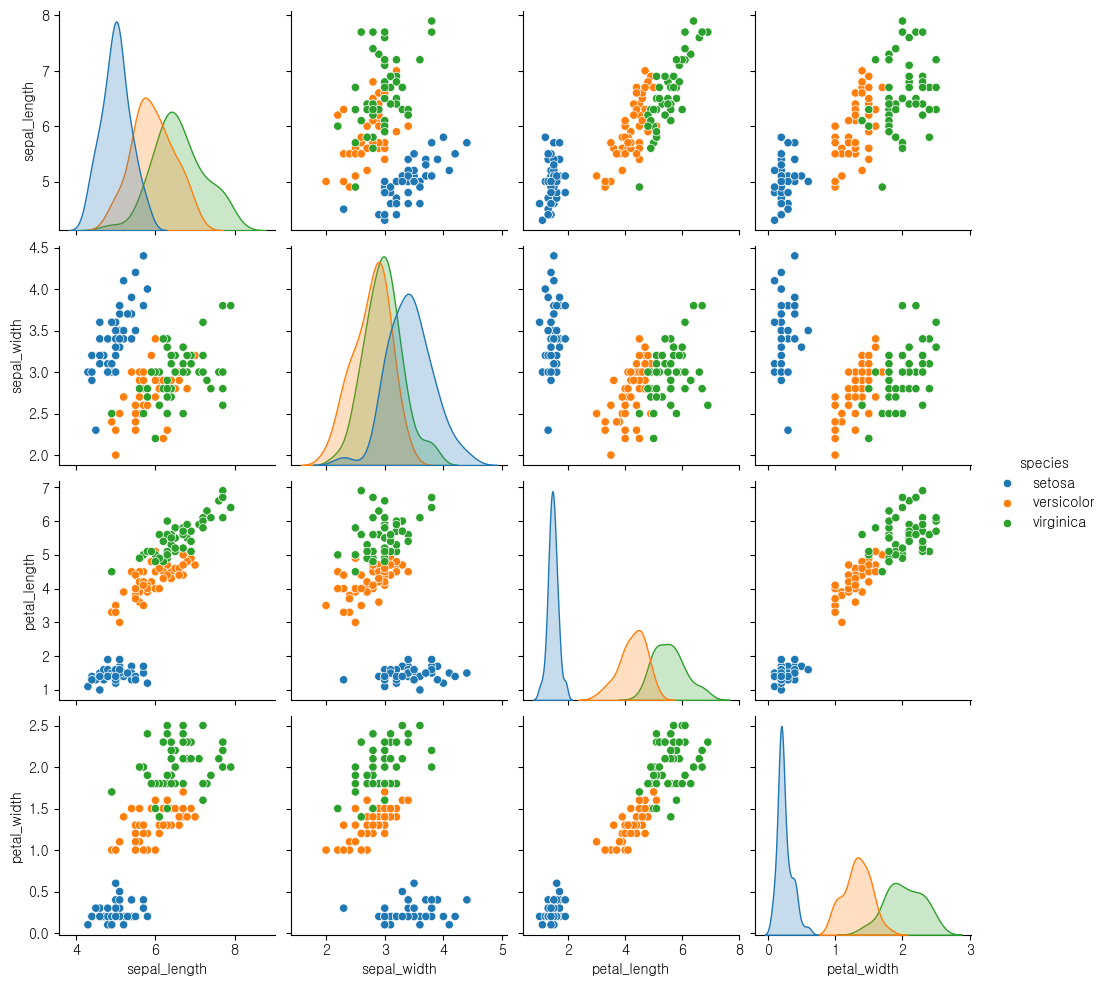

In [189]:
## visualization
sns.pairplot(iris, 
             hue = "species"
             )
plt.show()

In [218]:
X = iris.loc[:, :"petal_width"]
y = iris["species"]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, stratify = y) 
# 20%는 테스트로 빼겠다. 
print("train_X shape = ", train_X.shape)
print("test_X shape = ", test_X.shape)

train_X shape =  (120, 4)
test_X shape =  (30, 4)


In [219]:
test_y.value_counts()

species
setosa        10
virginica     10
versicolor    10
Name: count, dtype: int64

In [220]:
## Scaling 
mean = train_X.mean()
std = train_X.std()

print(mean, std)

sepal_length    5.833333
sepal_width     3.050833
petal_length    3.740833
petal_width     1.200833
dtype: float64 sepal_length    0.789355
sepal_width     0.459996
petal_length    1.744306
petal_width     0.763505
dtype: float64


In [221]:
train_scaled = (train_X -mean)/ std
test_scaled = (test_X -mean)/ std
test_scaled

,sepal_length,sepal_width,petal_length,petal_width
2,-1.435771,0.324278,-1.399315,-1.310840
147,0.844571,-0.110508,0.836531,1.046707
52,1.351314,0.106885,0.664543,0.391833
45,-1.309086,-0.110508,-1.341985,-1.179865
24,-1.309086,0.759065,-1.055338,-1.310840
130,1.984743,-0.545295,1.352496,0.915732
138,0.211143,-0.110508,0.607214,0.784758
58,0.971257,-0.327902,0.492555,0.129883
70,0.084457,0.324278,0.607214,0.784758
39,-0.929029,0.759065,-1.284656,-1.310840


In [238]:
# KNN 모델 정의
knn = KNeighborsClassifier()  # k = 5 (기본값)
knn.fit(train_scaled, train_y)

# 훈련 데이터에 대한 정확도 평가
print("train ACC = ", knn.score(train_scaled, train_y))

# 테스트 데이터에 대한 정확도 평가
print("test ACC = ", knn.score(test_scaled, test_y))  # test_scaled 사용


train ACC =  0.975
test ACC =  0.9666666666666667


In [224]:
print("classes = ", knn.classes_)
print("feature names = ", knn.feature_names_in)
print("metric = ", knn.effective_metric_)
print("sample = ", knn.n_samples_fit_)
print("k = ", knn.n_neighbors)

classes =  ['setosa' 'versicolor' 'virginica']


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_names_in'

C:\Users\user\AppData\Local\Temp\ipykernel_8020\183533644.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


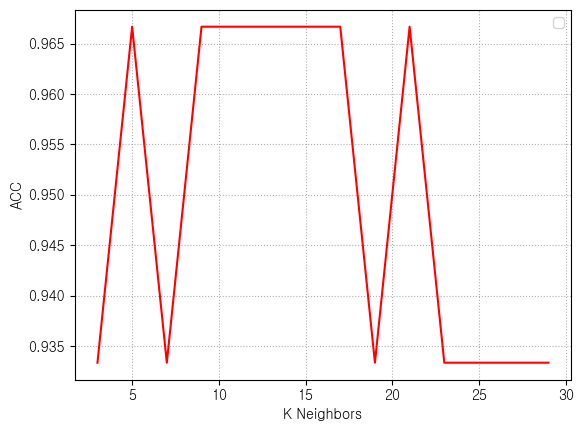

In [239]:
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30): 
    if n % 2 != 0: 
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

plt.plot(n_list, score_list, color = "r")
plt.grid(linestyle = ":")
plt.legend()
plt.xlabel("K Neighbors")
plt.ylabel("ACC")
plt.show()

In [252]:
## 
wine = pd.read_csv('http://bit.ly/wine-date')
print(wine.head())
print(wine["class"].value_counts())

#class 값 int로 바꾸기 
wine["class"] = wine["class"].astype("int32")
print(wine["class"].value_counts())
# 다른 열들을 이용해서 class를 맞춰보겠다~

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0
class
1.0    4898
0.0    1599
Name: count, dtype: int64
class
1    4898
0    1599
Name: count, dtype: int64


In [256]:
## Summary Statistic 
wine_group = wine.groupby("class", observed=True)

wine_group.describe()

for idx, data in wine_group: 
    print("class = ", idx)
    print(data.describe())
    print("="*50)

class =  0
           alcohol        sugar           pH   class
count  1599.000000  1599.000000  1599.000000  1599.0
mean     10.422983     2.538806     3.311113     0.0
std       1.065668     1.409928     0.154386     0.0
min       8.400000     0.900000     2.740000     0.0
25%       9.500000     1.900000     3.210000     0.0
50%      10.200000     2.200000     3.310000     0.0
75%      11.100000     2.600000     3.400000     0.0
max      14.900000    15.500000     4.010000     0.0
class =  1
           alcohol        sugar           pH   class
count  4898.000000  4898.000000  4898.000000  4898.0
mean     10.514267     6.391415     3.188267     1.0
std       1.230621     5.072058     0.151001     0.0
min       8.000000     0.600000     2.720000     1.0
25%       9.500000     1.700000     3.090000     1.0
50%      10.400000     5.200000     3.180000     1.0
75%      11.400000     9.900000     3.280000     1.0
max      14.200000    65.800000     3.820000     1.0


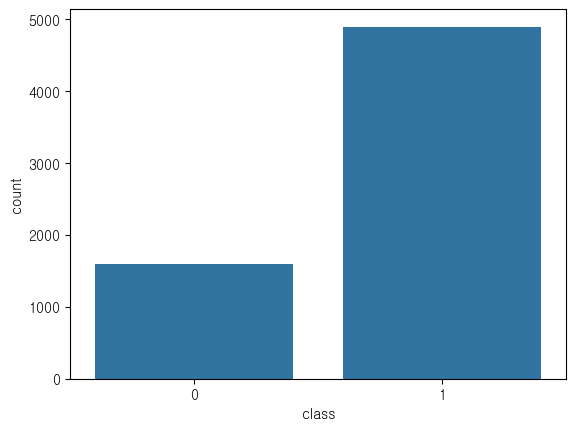

In [257]:
## Visualization
sns.countplot(wine, x = "class")
plt.show() # 1이 많은 데이터구나~

In [258]:
from sklearn.tree import DecisionTreeClassifier

In [267]:
# wine 데이터를 가지고 의사결정트리랑 그라디안트어쩌구랑 잘 맞는지 확인 
dt = DecisionTreeClassifier() #인스턴스 생성
X = wine.drop("class", axis =1)
y = wine["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)


In [273]:
# 의사결정트리 모델 생성 및 훈련
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 예측 및 정확도 평가
accuracy_dt = dt.score(X_test, y_test)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.86


In [275]:
from sklearn.ensemble import GradientBoostingClassifier

In [276]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# score 메서드를 사용하여 정확도 평가
accuracy_gb = gb.score(X_test, y_test)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

# 4. 결과 비교
print(f"\nComparison of Accuracies:")
print(f"Decision Tree: {accuracy_dt:.2f}")
print(f"Gradient Boosting: {accuracy_gb:.2f}")

Gradient Boosting Accuracy: 0.87

Comparison of Accuracies:
Decision Tree: 0.86
Gradient Boosting: 0.87
